In [15]:
import Bio
from Bio import Entrez, SeqIO, Seq
import pandas as pd
from IPython.display import Markdown, display
from dataclasses import dataclass

In [2]:
Entrez.email = "joshsteinbecker@gmail.com"

In [3]:
handle =       Entrez.efetch( 
                             db="nucleotide", 
                             id="NC_006577.2", 
                             rettype="gb", 
                             retmode="text") #IOWRAPPER
obj            = SeqIO.read(handle,'gb')

In [48]:
def geneTable  (gbid):
   
   Entrez.email = "joshsteinbecker@gmail.com"
   handle =       Entrez.efetch( 
                              db="nucleotide", 
                              id=gbid, 
                              rettype="gb", 
                              retmode="text") #IOWRAPPER
   obj            = SeqIO.read(handle,'gb')
   SEQ            = obj.seq
   LEN            = len(SEQ)
   TAXO           = obj.annotations['taxonomy']
   NAME           = obj.description

   GENES          = [obj.features[x] for x in range(len(obj.features)) if obj.features[x].type == "gene"]
   GNAMES         = [GENES[i].__dict__['qualifiers']['gene'][0] for i in range(len(GENES))]
   GSTARTS        = [int(GENES[i].location.start) for i in range(len(GENES))]
   GENDS          = [int(GENES[i].location.end)   for i in range(len(GENES))]
   GLENS          = [GENDS[i] - GSTARTS[i]        for i in range(len(GENES))]

   df = pd.DataFrame ({
      "gene":     GNAMES,
      "start":    GSTARTS,
      "end":      GENDS,
      "length":   GLENS
   })
   
   dic = {
      "name":       NAME,
      "taxonomy":   TAXO,
      "genoLength": LEN,
      "df":         df,
      "genes":      GENES
   }
   
   return dic


In [86]:
MONKEYPOX.keys()

dict_keys(['name', 'taxonomy', 'genoLength', 'df', 'genes'])

,gene,start,end,length
56,F8L,53690,56711,3021
89,L6R,83398,87259,3861
134,A25R,131206,134701,3495
181,B21R,181045,186685,5640


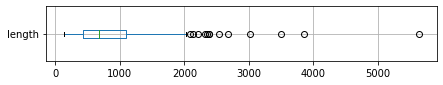

In [60]:
MONKEYPOX = geneTable("NC_003310")
df = MONKEYPOX['df']

pd.DataFrame(df['length']).boxplot(vert=False,figsize=(7,1))
df[df['length'] > 3000]

In [47]:
df['strand'] = df.gene.str.extract("\d+([RL])")
df.value_counts('strand')

strand
L    103
R     88
dtype: int64

In [31]:
defs = {
   "Good Suffix Rule" : 
      {"desc" : "If Suffix Matches then thats a good thing",
       "example": "ASS -- ASD"}
}

In [32]:
defs

{'Good Suffix Rule': {'desc': 'If Suffix Matches then thats a good thing',
  'example': 'ASS -- ASD'}}

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import random
import sklearn as skl

# HTML

In [79]:
import barcode as bc
from IPython.display import Image, HTML
html = """
<!DOCTYPE html>

<html>

<head>
   <style>
   h1   {color: powderblue;}
   h3   {color: pink;}
   p    {color: cyan;}
   </style>
</head>

<body>

   <h1>{N}</h1>
   
   <h3>Taxonomy:</h3>
   <p><i>{T}</i></p>
   
   <h3>Genes:</h3>
   <p>{DF}</p>

</body>

</html>""".replace("{DF}",   df.to_html())\
          .replace("{N}",    MONKEYPOX['name'])\
          .replace("{T}",    str(MONKEYPOX['taxonomy']))


HTML(html)

,gene,start,end,length
0,J1L,870,1611,741
1,J2L,1739,2786,1047
2,J3L,2876,4640,1764
3,D1L,4796,6110,1314
4,D2L,6926,7121,195
5,D3R,7555,7984,429
6,D4L,8829,9081,252
7,D5R,9566,10295,729
8,D6L,10522,10903,381
9,D7L,10962,12945,1983


In [81]:
def tryopen (name:str):
   try:
      file = open(name,"x")
   except:
      try: 
         file = open(name,"w")
      except:
         "Cannot Continue"
   return file

In [85]:
file = tryopen("bio.html")
file.write(html)
file.fileno()

80